用 leo 新跑的 bert  
有 title 跟 content 一起跑的  
所有運動員的都在裡面  
抓的資料是類別沒有先編碼的

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from glob import glob
import csv


In [2]:
# 連動雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [141]:
data = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_K/athelete_final_1.csv')
data

,category,title,content,limited_Bert,mix_predict,title_predict,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,comments
0,新聞,李智凱秀妻子送他歲生日豪禮要當爸,三立李鴻典台北報導恭喜李智凱秀妻子送他歲生日豪禮要當爸爸了完整新聞內文恭喜再恭喜歲體操國手鞍...,李智凱秀妻子送他歲生日豪禮要當爸:三立李鴻典台北報導恭喜李智凱秀妻子送他歲生日豪禮要當爸爸了...,pos,pos,0.7251,5.4967,0.4470,0.4347,6.0957,1.3124,5.8269,5.2276,17
1,新聞,台灣首位世界第「鞍馬王子」李智凱,林岳甫台灣首位世界第「鞍馬王子」李智凱我會繼續努力完整新聞內文在東京奧運勇奪鞍馬銀牌，為台灣...,台灣首位世界第「鞍馬王子」李智凱:林岳甫台灣首位世界第「鞍馬王子」李智凱我會繼續努力完整新聞...,pos,pos,0.4990,7.0486,0.5004,0.3577,7.2615,0.8641,6.1154,6.7392,11
2,新聞,李智凱登鞍馬世界第恩師林育信報喜,游郁香李智凱登鞍馬世界第恩師林育信報喜希望鼓勵小選手追夢完整新聞內文「鞍馬王子」李智凱以招牌...,李智凱登鞍馬世界第恩師林育信報喜:游郁香李智凱登鞍馬世界第恩師林育信報喜希望鼓勵小選手追夢完...,pos,pos,0.8893,7.6680,1.0379,0.7563,7.2815,1.3384,7.0499,6.5321,264
3,問卦,台灣李智凱奧運體操為什麼能贏歐美中國,歐美中國算是體操大國，歐美中國也投資很多資源在體操為什麼在台灣培訓，被台灣教練訓練李智凱能夠...,台灣李智凱奧運體操為什麼能贏歐美中國:歐美中國算是體操大國，歐美中國也投資很多資源在體操為什...,pos,pos,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13
4,問卦,李智凱敢挑戰街健嗎,街健肌肉應用最高形式完美控制身體藝術相比之下體操簡直是平淡創意卻企圖以華麗表演來掩飾李智凱雖...,李智凱敢挑戰街健嗎:街健肌肉應用最高形式完美控制身體藝術相比之下體操簡直是平淡創意卻企圖以華...,pos,pos,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,新聞,柯宇綸截圖質疑「郭婞淳教練擁抱舉動」,潘鈺楨柯宇綸截圖質疑「郭婞淳教練擁抱舉動」遭出征堅不刪文行為不自己判斷完整新聞內文「舉重女神...,柯宇綸截圖質疑「郭婞淳教練擁抱舉動」:潘鈺楨柯宇綸截圖質疑「郭婞淳教練擁抱舉動」遭出征堅不刪...,neg,neg,8.4973,0.7314,8.4190,8.0992,1.4839,8.5586,2.2353,2.0367,101
426,新聞,郭婞淳昔憂東奧正名無法出賽遭出征,中時中時新聞網趙偉陵中時季志翔郭婞淳昔憂東奧正名無法出賽遭出征奪金牌逆風成台灣之光完整新聞內...,郭婞淳昔憂東奧正名無法出賽遭出征:中時中時新聞網趙偉陵中時季志翔郭婞淳昔憂東奧正名無法出賽遭...,pos,neg,1.2011,0.9404,0.9429,1.1693,0.9027,2.3210,0.8875,0.7393,285
427,問卦,喂郭婞淳被教練擁抱時應該要甚麼表情才可以?,本佛納悶甚麼女權甲權余祥拳其實哀洞凱爾只要有一點點血性正常人台灣隔了年才又拿到奧運金牌一個跟...,喂郭婞淳被教練擁抱時應該要甚麼表情才可以?:本佛納悶甚麼女權甲權余祥拳其實哀洞凱爾只要有一點...,neg,pos,6.6478,0.2382,6.1981,6.6203,1.7261,6.9905,2.2559,0.6784,77
428,新聞,把郭婞淳寫成陳玟卉挨轟吳思瑤落淚致歉,新頭殼陳佩君台北市報導把郭婞淳寫成陳玟卉挨轟吳思瑤落淚致歉「再錯切腹」「舉重女神」郭婞淳昨天...,把郭婞淳寫成陳玟卉挨轟吳思瑤落淚致歉:新頭殼陳佩君台北市報導把郭婞淳寫成陳玟卉挨轟吳思瑤落淚...,neg,neg,1.0391,0.2730,0.8457,0.7389,0.1788,1.0394,0.5290,0.5312,212


In [145]:
data.loc[[397, 420, 131, 181, 248,284]]
#data.loc[[420]]
#data.loc[[131]]
#data.loc[[181]]
#data.loc[[248]]
#data.loc[[284]]

,category,title,content,limited_Bert,mix_predict,title_predict,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,comments
397,問卦,當年同意東奧正名看到郭婞淳奪金在想啥,引述&&之銘言台灣獨派覺青年來就一個樣蹭李安蹭張忠謀蹭台積電蹭健保都那蠢樣李安拍喜宴飲食男女...,當年同意東奧正名看到郭婞淳奪金在想啥:引述&&之銘言台灣獨派覺青年來就一個樣蹭李安蹭張忠謀蹭...,neg,pos,0.4941,0.4497,0.5506,0.4773,0.5016,0.5297,0.5460,0.4990,48
420,新聞,郭婞淳奪金男星「曬照神複製」致敬演,中時新聞網溫振甫郭婞淳奪金男星「曬照神複製」致敬演藝圈暴動了完整新聞內文中華代表團出征東京奧...,郭婞淳奪金男星「曬照神複製」致敬演:中時新聞網溫振甫郭婞淳奪金男星「曬照神複製」致敬演藝圈暴...,pos,neg,0.9019,6.7165,0.5813,0.5074,7.2552,1.2807,6.9558,6.1145,31
131,問卦,林昀儒有贏牌恐俱的心理啊?,引述之銘言一路看下來明明程度不錯但只要跟和高手過招幾乎都會追平被追平追平被追平無限輪迴然後明...,林昀儒有贏牌恐俱的心理啊?:引述之銘言一路看下來明明程度不錯但只要跟和高手過招幾乎都會追平被...,neg,neg,0.3430,0.1016,0.2949,0.2971,0.1608,0.3353,0.2160,0.1627,19
181,問卦,戴資穎穩了吧,戴資穎長年佔據球后寶座但始終沒有在奧運或世錦賽奪牌所以被戲稱積分后今年奧運總算突破魔咒奪銀接...,戴資穎穩了吧:戴資穎長年佔據球后寶座但始終沒有在奧運或世錦賽奪牌所以被戲稱積分后今年奧運總算...,pos,pos,0.6247,4.4378,0.2083,0.7450,5.0774,1.1803,4.9000,4.0764,30
248,新聞,東奧盧秀燕東奧獎金加碼楊勇緯奪銀牌,中時盧金足東奧盧秀燕東奧獎金加碼楊勇緯奪銀牌萬變萬完整新聞內文台中市運動健將在東京奧運奪牌創...,東奧盧秀燕東奧獎金加碼楊勇緯奪銀牌:中時盧金足東奧盧秀燕東奧獎金加碼楊勇緯奪銀牌萬變萬完整新...,pos,pos,0.4664,6.9290,0.8881,0.2106,7.4119,1.0019,7.0467,6.5205,87
284,問卦,楊勇緯在飛機上遇到詹家姐妹要說什麼,楊勇緯奪得台灣第一面柔道獎牌回程在飛機上遇到第一輪淘汰詹家姊妹詹資源比他多備份也比他高遇到要...,楊勇緯在飛機上遇到詹家姐妹要說什麼:楊勇緯奪得台灣第一面柔道獎牌回程在飛機上遇到第一輪淘汰詹...,neg,pos,0.1669,0.9566,0.3104,0.0500,0.5799,0.0152,0.4996,1.0176,48


In [114]:
# 重新排序col name順序
data.drop(columns=['title', 'content', 'limited_Bert'], axis=1)
data = data[['category', 'mix_predict', 'title_predict', 'Trust', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Anger', 'Disgust', 'Sadness', 'comments']]
data

,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,comments
0,新聞,pos,pos,5.2276,6.0957,5.8269,5.4967,0.4347,0.7251,0.4470,1.3124,17
1,新聞,pos,pos,6.7392,7.2615,6.1154,7.0486,0.3577,0.4990,0.5004,0.8641,11
2,新聞,pos,pos,6.5321,7.2815,7.0499,7.6680,0.7563,0.8893,1.0379,1.3384,264
3,問卦,pos,pos,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13
4,問卦,pos,pos,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37
...,...,...,...,...,...,...,...,...,...,...,...,...
425,新聞,neg,neg,2.0367,1.4839,2.2353,0.7314,8.0992,8.4973,8.4190,8.5586,101
426,新聞,pos,neg,0.7393,0.9027,0.8875,0.9404,1.1693,1.2011,0.9429,2.3210,285
427,問卦,neg,pos,0.6784,1.7261,2.2559,0.2382,6.6203,6.6478,6.1981,6.9905,77
428,新聞,neg,neg,0.5312,0.1788,0.5290,0.2730,0.7389,1.0391,0.8457,1.0394,212


In [ ]:
# 輸出給 leo
data.to_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_K/rf_final.csv')

In [115]:
# remove keymoji = 0
data_remove_na = data[data.Trust != 0]
data_remove_na

,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,comments
0,新聞,pos,pos,5.2276,6.0957,5.8269,5.4967,0.4347,0.7251,0.4470,1.3124,17
1,新聞,pos,pos,6.7392,7.2615,6.1154,7.0486,0.3577,0.4990,0.5004,0.8641,11
2,新聞,pos,pos,6.5321,7.2815,7.0499,7.6680,0.7563,0.8893,1.0379,1.3384,264
5,問卦,pos,neg,0.7988,0.7348,0.1838,0.0977,5.7180,5.2093,5.5036,5.8055,1
6,問卦,neg,neg,1.9442,0.7051,1.3637,0.4363,7.9398,7.6130,8.1667,7.5377,11
...,...,...,...,...,...,...,...,...,...,...,...,...
423,問卦,neg,neg,1.4795,0.3989,0.9883,0.4617,7.2876,6.5310,6.8515,7.3672,1
425,新聞,neg,neg,2.0367,1.4839,2.2353,0.7314,8.0992,8.4973,8.4190,8.5586,101
426,新聞,pos,neg,0.7393,0.9027,0.8875,0.9404,1.1693,1.2011,0.9429,2.3210,285
427,問卦,neg,pos,0.6784,1.7261,2.2559,0.2382,6.6203,6.6478,6.1981,6.9905,77


In [ ]:
# drop outliers Trust

from scipy.stats import zscore
z_scores_t = zscore(data.Trust)
abs_z_scores_t = np.abs(z_scores_t)
filtered_entries_t = abs_z_scores_t > 3
np.where(filtered_entries_t)[0]
#filtered_entries_t

array([252])

In [ ]:
# drop outliers Joy

from scipy.stats import zscore
z_scores_j = zscore(data.Joy)
abs_z_scores_j = np.abs(z_scores_j)
filtered_entries_j = abs_z_scores_j > 3
np.where(filtered_entries_j)[0]

array([], dtype=int64)

In [ ]:
# drop outliers Surprise

from scipy.stats import zscore
z_scores_s = zscore(data.Surprise)
abs_z_scores_s = np.abs(z_scores_s)
filtered_entries_s = abs_z_scores_s > 3
np.where(filtered_entries_s)[0]

array([], dtype=int64)

In [ ]:
# drop outliers Anticipation

from scipy.stats import zscore
z_scores_a = zscore(data.Anticipation)
abs_z_scores_a = np.abs(z_scores_a)
filtered_entries_a = abs_z_scores_a > 3
np.where(filtered_entries_a)[0]

array([], dtype=int64)

In [ ]:
# drop outliers Fear

from scipy.stats import zscore
z_scores_f = zscore(data.Fear)
abs_z_scores_f = np.abs(z_scores_f)
filtered_entries_f = abs_z_scores_f > 3
np.where(filtered_entries_f)[0]

array([  6,  84, 225, 240, 249, 254, 425])

In [ ]:
# drop outliers Anger

from scipy.stats import zscore
z_scores_an = zscore(data.Anger)
abs_z_scores_an = np.abs(z_scores_an)
filtered_entries_an = abs_z_scores_an > 3
np.where(filtered_entries_an)[0]

array([  6,  42,  84, 184, 218, 225, 240, 249, 250, 254, 269, 276, 425])

In [ ]:
# drop outliers Disgust

from scipy.stats import zscore
z_scores_d = zscore(data.Disgust)
abs_z_scores_d = np.abs(z_scores_d)
filtered_entries_d = abs_z_scores_d > 3
np.where(filtered_entries_d)[0]

array([  6,  42,  84, 218, 225, 240, 249, 254, 269, 425])

In [ ]:
# drop outliers Sadness

from scipy.stats import zscore
z_scores_s = zscore(data.Sadness)
abs_z_scores_s = np.abs(z_scores_s)
filtered_entries_s = abs_z_scores_s > 3
np.where(filtered_entries_s)[0]

array([ 84, 184, 225, 240, 249, 250, 254, 365, 425])

In [116]:
# drop row 6, 42, 84, 184, 218, 225, 240, 249, 250, 252, 254, 269, 276, 365, 425

data_remove_outlier = data.drop([6, 42, 84, 184, 218, 225, 240, 249, 250, 252, 254, 269, 276, 365, 425], axis=0)
data_remove_outlier

,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,comments
0,新聞,pos,pos,5.2276,6.0957,5.8269,5.4967,0.4347,0.7251,0.4470,1.3124,17
1,新聞,pos,pos,6.7392,7.2615,6.1154,7.0486,0.3577,0.4990,0.5004,0.8641,11
2,新聞,pos,pos,6.5321,7.2815,7.0499,7.6680,0.7563,0.8893,1.0379,1.3384,264
3,問卦,pos,pos,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13
4,問卦,pos,pos,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37
...,...,...,...,...,...,...,...,...,...,...,...,...
424,問卦,neg,neg,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,133
426,新聞,pos,neg,0.7393,0.9027,0.8875,0.9404,1.1693,1.2011,0.9429,2.3210,285
427,問卦,neg,pos,0.6784,1.7261,2.2559,0.2382,6.6203,6.6478,6.1981,6.9905,77
428,新聞,neg,neg,0.5312,0.1788,0.5290,0.2730,0.7389,1.0391,0.8457,1.0394,212


In [117]:
# drop row 6, 42, 84, 184, 218, 225, 240, 249, 250, 252, 254, 269, 276, 365, 425

data_remove_outlier = data_remove_na.drop([6, 42, 84, 184, 218, 225, 240, 249, 250, 252, 254, 269, 276, 365, 425], axis=0)
data_remove_outlier

,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,comments
0,新聞,pos,pos,5.2276,6.0957,5.8269,5.4967,0.4347,0.7251,0.4470,1.3124,17
1,新聞,pos,pos,6.7392,7.2615,6.1154,7.0486,0.3577,0.4990,0.5004,0.8641,11
2,新聞,pos,pos,6.5321,7.2815,7.0499,7.6680,0.7563,0.8893,1.0379,1.3384,264
5,問卦,pos,neg,0.7988,0.7348,0.1838,0.0977,5.7180,5.2093,5.5036,5.8055,1
9,新聞,pos,pos,6.2177,7.1949,6.9580,7.0330,0.2766,0.7458,0.9264,1.4924,13
...,...,...,...,...,...,...,...,...,...,...,...,...
420,新聞,pos,neg,6.1145,7.2552,6.9558,6.7165,0.5074,0.9019,0.5813,1.2807,31
423,問卦,neg,neg,1.4795,0.3989,0.9883,0.4617,7.2876,6.5310,6.8515,7.3672,1
426,新聞,pos,neg,0.7393,0.9027,0.8875,0.9404,1.1693,1.2011,0.9429,2.3210,285
427,問卦,neg,pos,0.6784,1.7261,2.2559,0.2382,6.6203,6.6478,6.1981,6.9905,77


In [94]:
# log transform

data_remove_outlier['Trust_log'] = np.log2(data_remove_outlier['Trust'])
data_remove_outlier['Joy_log'] = np.log2(data_remove_outlier['Joy'])
data_remove_outlier['Surprise_log'] = np.log2(data_remove_outlier['Surprise'])
data_remove_outlier['Anticipation_log'] = np.log2(data_remove_outlier['Anticipation'])
data_remove_outlier['Fear_log'] = np.log2(data_remove_outlier['Fear'])
data_remove_outlier['Anger_log'] = np.log2(data_remove_outlier['Anger'])
data_remove_outlier['Disgust_log'] = np.log2(data_remove_outlier['Disgust'])
data_remove_outlier['Sadness_log'] = np.log2(data_remove_outlier['Sadness'])
data_remove_outlier['comments_log'] = np.log2(data_remove_outlier['comments'])
data_remove_outlier

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,...,comments,Trust_log,Joy_log,Surprise_log,Anticipation_log,Fear_log,Anger_log,Disgust_log,Sadness_log,comments_log
0,新聞,pos,pos,5.2276,6.0957,5.8269,5.4967,0.4347,0.7251,0.4470,...,17,2.386149,2.607792,2.542729,2.458566,-1.201908,-0.463748,-1.161653,0.392207,4.087463
1,新聞,pos,pos,6.7392,7.2615,6.1154,7.0486,0.3577,0.4990,0.5004,...,11,2.752577,2.860268,2.612447,2.817337,-1.483178,-1.002888,-0.998846,-0.210730,3.459432
2,新聞,pos,pos,6.5321,7.2815,7.0499,7.6680,0.7563,0.8893,1.0379,...,264,2.707547,2.864236,2.817603,2.938850,-0.402969,-0.169258,0.053667,0.420509,8.044394
5,問卦,pos,neg,0.7988,0.7348,0.1838,0.0977,5.7180,5.2093,5.5036,...,1,-0.324094,-0.444576,-2.443791,-3.355498,2.515511,2.381090,2.460376,2.537420,0.000000
9,新聞,pos,pos,6.2177,7.1949,6.9580,7.0330,0.2766,0.7458,0.9264,...,13,2.636381,2.846975,2.798673,2.814140,-1.854127,-0.423139,-0.110293,0.577634,3.700440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,新聞,pos,neg,6.1145,7.2552,6.9558,6.7165,0.5074,0.9019,0.5813,...,31,2.612235,2.859015,2.798216,2.747710,-0.978805,-0.148961,-0.782645,0.356933,4.954196
423,問卦,neg,neg,1.4795,0.3989,0.9883,0.4617,7.2876,6.5310,6.8515,...,1,0.565110,-1.325901,-0.016979,-1.114972,2.865444,2.707304,2.776420,2.881116,0.000000
426,新聞,pos,neg,0.7393,0.9027,0.8875,0.9404,1.1693,1.2011,0.9429,...,285,-0.435768,-0.147681,-0.172181,-0.088654,0.225645,0.264356,-0.084823,1.214747,8.154818
427,問卦,neg,pos,0.6784,1.7261,2.2559,0.2382,6.6203,6.6478,6.1981,...,77,-0.559792,0.787516,1.173703,-2.069755,2.726897,2.732877,2.631826,2.805396,6.266787


In [118]:
# log transform

data_remove_outlier['Trust'] = np.log2(data_remove_outlier['Trust'])
data_remove_outlier['Joy'] = np.log2(data_remove_outlier['Joy'])
data_remove_outlier['Surprise'] = np.log2(data_remove_outlier['Surprise'])
data_remove_outlier['Anticipation'] = np.log2(data_remove_outlier['Anticipation'])
data_remove_outlier['Fear'] = np.log2(data_remove_outlier['Fear'])
data_remove_outlier['Anger'] = np.log2(data_remove_outlier['Anger'])
data_remove_outlier['Disgust'] = np.log2(data_remove_outlier['Disgust'])
data_remove_outlier['Sadness'] = np.log2(data_remove_outlier['Sadness'])
data_remove_outlier['comments'] = np.log2(data_remove_outlier['comments'])
data_remove_outlier

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,comments
0,新聞,pos,pos,2.386149,2.607792,2.542729,2.458566,-1.201908,-0.463748,-1.161653,0.392207,4.087463
1,新聞,pos,pos,2.752577,2.860268,2.612447,2.817337,-1.483178,-1.002888,-0.998846,-0.210730,3.459432
2,新聞,pos,pos,2.707547,2.864236,2.817603,2.938850,-0.402969,-0.169258,0.053667,0.420509,8.044394
5,問卦,pos,neg,-0.324094,-0.444576,-2.443791,-3.355498,2.515511,2.381090,2.460376,2.537420,0.000000
9,新聞,pos,pos,2.636381,2.846975,2.798673,2.814140,-1.854127,-0.423139,-0.110293,0.577634,3.700440
...,...,...,...,...,...,...,...,...,...,...,...,...
420,新聞,pos,neg,2.612235,2.859015,2.798216,2.747710,-0.978805,-0.148961,-0.782645,0.356933,4.954196
423,問卦,neg,neg,0.565110,-1.325901,-0.016979,-1.114972,2.865444,2.707304,2.776420,2.881116,0.000000
426,新聞,pos,neg,-0.435768,-0.147681,-0.172181,-0.088654,0.225645,0.264356,-0.084823,1.214747,8.154818
427,問卦,neg,pos,-0.559792,0.787516,1.173703,-2.069755,2.726897,2.732877,2.631826,2.805396,6.266787


In [ ]:
data_remove_na.dtypes

category          object
mix_predict       object
title_predict     object
Trust            float64
Joy              float64
Surprise         float64
Anticipation     float64
Fear             float64
Anger            float64
Disgust          float64
Sadness          float64
comments           int64
dtype: object

把原本是文字用1234代表，應該前面就要做

類別做label encode就好，先餵進去看效果

drop掉outlier

split 前對整個表格做 log transform，不能碰到neg/pos

log 可用 2 為底  

drop out rate (random forest 那行code)，愈低愈好

In [119]:
# RF train
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_remove_outlier.drop(columns=['comments'], axis=1), data_remove_outlier['comments'], test_size=0.3, random_state=42)

# Label_Encoder
labelencoder = LabelEncoder()
columns = ['category', 'mix_predict','title_predict']
for col_name in columns: 
    train_x[col_name] = labelencoder.fit_transform(train_x[col_name])

# Label_Encoder
labelencoder = LabelEncoder()
columns = ['category', 'mix_predict','title_predict']
for col_name in columns: 
    test_x[col_name] = labelencoder.fit_transform(test_x[col_name])

In [ ]:
# RF train
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data.drop(columns=['comments'], axis=1), data['comments'], test_size=0.3, random_state=42)

# Label_Encoder
labelencoder = LabelEncoder()
columns = ['category', 'mix_predict','title_predict']
for col_name in columns: 
    train_x[col_name] = labelencoder.fit_transform(train_x[col_name])

# Label_Encoder
labelencoder = LabelEncoder()
columns = ['category', 'mix_predict','title_predict']
for col_name in columns: 
    test_x[col_name] = labelencoder.fit_transform(test_x[col_name])

In [ ]:
# RF train
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_remove_na.drop(columns=['comments'], axis=1), data_remove_na['comments'], test_size=0.3, random_state=42)

# Label_Encoder
labelencoder = LabelEncoder()
columns = ['category', 'mix_predict','title_predict']
for col_name in columns: 
    train_x[col_name] = labelencoder.fit_transform(train_x[col_name])

# Label_Encoder
labelencoder = LabelEncoder()
columns = ['category', 'mix_predict','title_predict']
for col_name in columns: 
    test_x[col_name] = labelencoder.fit_transform(test_x[col_name])

In [155]:
train_x

,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness
10,2,1,1,2.507287,2.838972,2.945439,2.781779,-2.442222,-0.259634,-2.272297,-0.095728
86,3,1,1,-0.715012,-1.288417,-1.212902,-3.056491,2.361572,2.334826,2.455676,2.382418
185,2,1,1,2.583784,2.874797,2.800600,2.711187,-2.031504,-1.445362,-0.897006,-0.041863
232,2,0,0,2.835277,2.974125,2.784923,2.796307,-2.625934,-2.712173,-3.394411,-0.045431
332,2,1,1,0.273217,-2.362900,-0.443595,-2.355498,2.607390,2.637819,2.627467,2.554147
...,...,...,...,...,...,...,...,...,...,...,...
172,2,1,1,2.687621,2.819873,2.868371,2.778272,-0.921937,-0.482372,-0.333698,0.657183
21,2,1,1,2.735154,2.909428,3.038858,2.710834,1.107487,1.499425,1.418136,1.969381
147,1,0,1,0.002018,-0.256873,-0.551733,-0.507788,-1.558092,-1.771027,-1.471129,-1.187707
313,1,0,0,-1.656990,-1.961845,-1.764641,-2.414268,-0.792607,-1.144648,-0.806165,-0.780661


In [154]:
train_y

10     3.584963
86     7.219169
185    7.219169
232    7.011227
332    8.194757
         ...   
172    4.700440
21     6.954196
147    4.169925
313    3.584963
165    3.906891
Name: comments, Length: 161, dtype: float64

In [122]:
test_x

,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness
397,0,0,1,-1.002888,-0.995391,-0.873027,-1.152965,-1.067032,-1.017125,-0.860923,-0.916753
101,0,0,0,3.089464,2.834509,2.517528,3.066227,1.149129,0.257011,1.264416,0.507008
15,0,1,1,2.569054,2.744183,2.765068,2.677553,-1.190997,-0.839596,-1.803897,0.378623
343,0,1,1,2.389870,2.573132,2.377707,2.370890,-1.826233,-0.486408,-0.805661,-0.017563
22,1,1,1,2.548116,2.748783,2.705425,2.625083,-2.487621,-0.438307,-0.966066,-0.226341
...,...,...,...,...,...,...,...,...,...,...,...
192,1,1,1,2.277806,2.632338,2.580483,2.508758,-2.649276,-1.089881,-0.491267,-0.030619
41,1,0,0,0.228480,0.738638,0.474566,-3.340806,2.613791,2.413513,2.561131,2.824055
261,1,1,1,2.745431,2.805912,2.766956,2.792335,-2.486004,-0.585540,0.028286,-0.524500
104,0,1,0,2.614356,2.494288,0.495183,-0.414653,-0.489038,-0.622821,-0.543509,-0.466536


In [140]:
%load_ext google.colab.data_table
df = pd.DataFrame(test_y) 
df

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,comments
397,5.584963
101,2.000000
15,2.000000
343,6.321928
22,5.169925
...,...
192,4.459432
41,2.584963
261,4.247928
104,4.643856


In [124]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42) # drop out rate
regressor.fit(train_x, train_y)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [101]:
from sklearn.ensemble import RandomForestRegressor
y_pred = regressor.predict(test_x)

ValueError: ignored

In [125]:
y_pred

array([5.30798257, 6.14963973, 4.65820305, 4.05019119, 4.65020237,
       5.1546823 , 6.65141745, 6.39416136, 5.49748074, 4.37999939,
       4.83440881, 4.69990381, 4.67421574, 4.2473604 , 5.60233402,
       4.69035799, 4.67104826, 5.35835489, 4.78218169, 5.07272531,
       5.73842332, 5.00529664, 4.16171495, 4.70535069, 6.50370446,
       4.59079041, 4.52902233, 3.66397953, 5.42561109, 5.90509005,
       5.38647039, 3.42132375, 4.40269906, 5.75405999, 5.54782056,
       4.60654528, 5.76548928, 4.74509805, 4.172061  , 5.16574731,
       5.60744486, 4.59779972, 5.70682822, 4.89595805, 4.90169552,
       4.62760657, 6.34526407, 5.54757423, 5.63918255, 6.14963973,
       5.81370847, 4.63941892, 6.39416136, 5.82893608, 5.58059902,
       4.85376677, 5.97391976, 4.84716355, 5.62439351, 4.94002055,
       3.99360183, 6.28704797, 5.18795856, 5.75699189, 4.89352198,
       4.619536  , 5.7869646 , 5.01541888, 5.92880964])

In [126]:
test_y.to_numpy()

array([5.5849625 , 2.        , 2.        , 6.32192809, 5.169925  ,
       6.76818432, 5.20945337, 4.08746284, 2.80735492, 6.4918531 ,
       2.80735492, 6.50779464, 8.51963625, 4.7548875 , 2.32192809,
       7.83289001, 6.93073734, 1.5849625 , 4.95419631, 3.169925  ,
       4.        , 2.5849625 , 2.        , 7.24792751, 7.40939094,
       2.80735492, 4.169925  , 7.17990909, 4.95419631, 4.45943162,
             -inf, 3.70043972, 3.5849625 , 7.93073734, 8.56605404,
       3.32192809, 6.94251451, 4.45943162, 4.24792751, 7.82654849,
       4.70043972, 5.55458885, 6.70043972, 3.70043972, 4.9068906 ,
       6.857981  , 6.4429435 , 4.45943162, 5.5849625 , 2.32192809,
       6.74146699, 4.9068906 , 4.08746284, 7.71424552, 3.9068906 ,
       5.78135971, 4.        , 2.80735492, 6.02236781, 5.4918531 ,
       4.70043972, 8.24317398, 3.9068906 , 4.5849625 , 4.45943162,
       2.5849625 , 4.24792751, 4.64385619, 3.45943162])

In [127]:
new_test_y = np.delete(test_y.to_numpy(), 30)
new_pred_y = np.delete(y_pred, 30)
print(new_test_y)
print(new_pred_y)

[5.5849625  2.         2.         6.32192809 5.169925   6.76818432
 5.20945337 4.08746284 2.80735492 6.4918531  2.80735492 6.50779464
 8.51963625 4.7548875  2.32192809 7.83289001 6.93073734 1.5849625
 4.95419631 3.169925   4.         2.5849625  2.         7.24792751
 7.40939094 2.80735492 4.169925   7.17990909 4.95419631 4.45943162
 3.70043972 3.5849625  7.93073734 8.56605404 3.32192809 6.94251451
 4.45943162 4.24792751 7.82654849 4.70043972 5.55458885 6.70043972
 3.70043972 4.9068906  6.857981   6.4429435  4.45943162 5.5849625
 2.32192809 6.74146699 4.9068906  4.08746284 7.71424552 3.9068906
 5.78135971 4.         2.80735492 6.02236781 5.4918531  4.70043972
 8.24317398 3.9068906  4.5849625  4.45943162 2.5849625  4.24792751
 4.64385619 3.45943162]
[5.30798257 6.14963973 4.65820305 4.05019119 4.65020237 5.1546823
 6.65141745 6.39416136 5.49748074 4.37999939 4.83440881 4.69990381
 4.67421574 4.2473604  5.60233402 4.69035799 4.67104826 5.35835489
 4.78218169 5.07272531 5.73842332 5.005296

In [157]:
compare = pd.DataFrame({'Actual': new_test_y, 'Predict': new_pred_y})
compare

,Actual,Predict
0,5.584963,5.307983
1,2.000000,6.149640
2,2.000000,4.658203
3,6.321928,4.050191
4,5.169925,4.650202
...,...,...
63,4.459432,4.893522
64,2.584963,4.619536
65,4.247928,5.786965
66,4.643856,5.015419


In [129]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(new_test_y, new_pred_y))
print('Mean Squared Error:', metrics.mean_squared_error(new_test_y, new_pred_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(new_test_y, new_pred_y)))

Mean Absolute Error: 1.5904733711081305
Mean Squared Error: 3.6530239281796746
Root Mean Squared Error: 1.9112885517837632


In [130]:
# Calculate the absolute errors
errors = abs(new_pred_y - new_test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / new_test_y)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.59 degrees.
Accuracy: 58.06 %.


In [31]:
from sklearn.ensemble import RandomForestRegressor

# 建立RandomForestRegressor模型
randomForestModel = RandomForestRegressor(n_estimators=1000, random_state=42)
# 使用訓練資料訓練模型
randomForestModel.fit(train_x, train_y.values.ravel().astype(np.float64))
# 使用訓練資料預測
predictions = randomForestModel.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y.values.ravel().astype(np.float64))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: inf degrees.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 建立RandomForestRegressor模型
randomForestModel = RandomForestRegressor(n_estimators=1000, random_state=42)
# 使用訓練資料訓練模型
randomForestModel.fit(train_x, train_y)
# 使用訓練資料預測
predictions = randomForestModel.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 63.56 degrees.


In [51]:
features = train_x.columns.to_list()
feature_importances = randomForestModel.feature_importances_
forest_importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)
print("The firstly important features is: ", forest_importances.index[0])
print("The secondly important features is: ", forest_importances.index[1])
print("The thirdly important features is: ", forest_importances.index[2])

The firstly important features is:  Anticipation
The secondly important features is:  Surprise
The thirdly important features is:  Fear


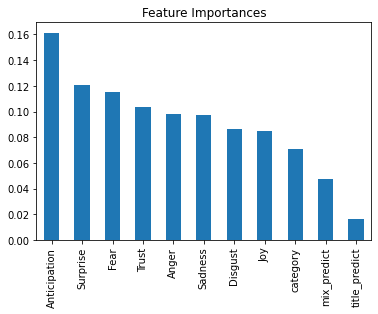

In [52]:
forest_importances.plot.bar()
plt.title('Feature Importances')
plt.show()

In [151]:
2 ** new_pred_y[0] # 397
#2 ** 5.5849625

39.615210799746606

In [65]:
2 ** new_test_y[18] # 420
2 ** new_pred_y[18]

30.999999999999993

In [149]:
2 ** new_test_y[37] # 131
#2 ** new_pred_y[37]

18.999999999999996

In [71]:
2 ** new_test_y[43] # 181
2 ** new_pred_y[43]

29.892165760277173

In [73]:
2 ** new_test_y[45] # 248
2 ** new_pred_y[45]

81.30454325007842

In [152]:
2 ** new_test_y[47] # 284
#2 ** new_pred_y[47]

48.0

In [158]:
2 ** new_pred_y[22]

17.89785692085801

In [159]:
2 ** new_pred_y[36]

26.817410900494153

In [ ]:
data.to_csv('/content/drive/Shareddrives/Text Mining/CSV/data_final.tsv', sep='\t', header=None, index=False)

# 以下是舊的

In [ ]:
# import keymoji scores into dataframe

keymoji_all = glob('/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_*.csv')
#keymoji_all = glob('/content/drive/MyDrive/Colab Notebooks/final/csv/Keymoji/KeyMoji_score_*.csv')
print(keymoji_all)


df_key_all = pd.DataFrame()

for filename in keymoji_all:
  df = pd.read_csv(filename, header=0, index_col=0)
  df_key_all = pd.concat([df_key_all, df], axis=0)

df_key_all = df_key_all.reset_index(drop=True)
df_key_all

['/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_GUO.csv', '/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_YANG.csv', '/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_LEE.csv', '/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_LIN.csv', '/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_TAI.csv']


,Title,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,問卦歐美中國舉重同量級無法超越台灣郭婞淳,2.4902,0.5397,12.5000,0.5853,0.5593,2.3929,0.5058,0.5238
1,新聞世錦賽舉重女神郭婞淳挺舉總和,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,爆卦郭婞淳2021舉重世錦賽挺舉總和金牌,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,問卦郭婞淳國語也太不標準了吧,0.2071,0.7107,0.2502,0.0500,0.5348,0.2662,0.2890,0.5320
4,問卦如果郭婞淳的故事拍電影讓瑤瑤演可以嗎,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
428,新聞陳其邁暖迎戴資穎讓她吃好睡好小,0.4321,0.8954,0.0990,0.2308,3.0642,0.8822,2.0326,2.2016
429,問卦戴資穎受訪的時候要問他什麼,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
430,新聞戴資穎深夜罕見動怒被批沒奪金失誤,0.4184,0.3327,0.4360,0.4340,0.3128,0.4940,0.4748,0.3760
431,新聞戴資穎返台罕見說重話回文站在場上,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
# merge原本的df跟keymoji
data_all = pd.merge(data, df_key_all, how='outer', left_index=True, right_index=True)
print(data_all)

# Title_y改名Title
data_all = data_all.rename(columns={'Title_y' : 'Title'})

# drop有符號的title_x
data_all = data_all.drop(columns=['Title_x'])

# 重新排序col name順序
data_all = data_all[['Title', 'Prediction', 'NEG', 'POS', 'Trust', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Anger', 'Disgust', 'Sadness']]
data_all


                            Title_x Prediction NEG POS               Title_y  \
0    [問卦]歐美中國舉重同量級無法超越台灣郭婞淳？               neg   1   0  問卦歐美中國舉重同量級無法超越台灣郭婞淳   
1    [新聞] 世錦賽》「舉重女神」郭婞淳挺舉、總和               pos   0   1      新聞世錦賽舉重女神郭婞淳挺舉總和   
2    [爆卦] 郭婞淳2021舉重世錦賽挺舉&總和金牌              pos   0   1  爆卦郭婞淳2021舉重世錦賽挺舉總和金牌   
3    [問卦] 郭婞淳國語也太不標準了吧？                    neg   1   0        問卦郭婞淳國語也太不標準了吧   
4    [問卦] 如果郭婞淳的故事拍電影讓瑤瑤演可以嗎？              pos   0   1  問卦如果郭婞淳的故事拍電影讓瑤瑤演可以嗎   
..                              ...        ...  ..  ..                   ...   
428  [問卦] 楊勇緯身高167 會被台女嫌矮嗎？                neg   1   0     新聞陳其邁暖迎戴資穎讓她吃好睡好小   
429  [問卦] 台中柔道館vs楊勇緯                       neg   1   0       問卦戴資穎受訪的時候要問他什麼   
430  [新聞] 楊勇緯奪台灣第一面獎牌　蔡英文恭賀：               pos   0   1    新聞戴資穎深夜罕見動怒被批沒奪金失誤   
431  [問卦] 高藤直壽幹嘛把楊勇緯的手手舉起來？                neg   1   0    新聞戴資穎返台罕見說重話回文站在場上   
432  [新聞] 「讓世界看見台灣柔道」楊勇緯：我要的               pos   0   1    新聞幻象伴飛戴資穎麟洋配蔡壁如發文誤   

      Anger  Anticipation  Disgust    F

,Title,Prediction,NEG,POS,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness
0,問卦歐美中國舉重同量級無法超越台灣郭婞淳,neg,1,0,0.5238,0.5593,0.5058,0.5397,0.5853,2.4902,12.5000,2.3929
1,新聞世錦賽舉重女神郭婞淳挺舉總和,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,爆卦郭婞淳2021舉重世錦賽挺舉總和金牌,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,問卦郭婞淳國語也太不標準了吧,neg,1,0,0.5320,0.5348,0.2890,0.7107,0.0500,0.2071,0.2502,0.2662
4,問卦如果郭婞淳的故事拍電影讓瑤瑤演可以嗎,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
428,新聞陳其邁暖迎戴資穎讓她吃好睡好小,neg,1,0,2.2016,3.0642,2.0326,0.8954,0.2308,0.4321,0.0990,0.8822
429,問卦戴資穎受訪的時候要問他什麼,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
430,新聞戴資穎深夜罕見動怒被批沒奪金失誤,pos,0,1,0.3760,0.3128,0.4748,0.3327,0.4340,0.4184,0.4360,0.4940
431,新聞戴資穎返台罕見說重話回文站在場上,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
# 判斷是否為極值
# 每個情緒指標最高12.5分，若負向或正向其中一者超過5，則表示為極值，因此label為1
pos_sum = data_all["Trust"] + data_all["Joy"] + data_all["Surprise"] + data_all["Anticipation"]
neg_sum = data_all["Fear"] + data_all["Anger"] + data_all["Sadness"] + data_all["Disgust"]

# print(np.mean(pos_sum)) = 5.289057505773668
# print(np.mean(neg_sum)) = 4.238909699769053

data_all['IS_EXTREME'] = np.where((pos_sum>5) | (neg_sum>5), '1', '0')
data_all

,Title,Prediction,NEG,POS,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,IS_EXTREME
0,問卦歐美中國舉重同量級無法超越台灣郭婞淳,neg,1,0,0.5238,0.5593,0.5058,0.5397,0.5853,2.4902,12.5000,2.3929,1
1,新聞世錦賽舉重女神郭婞淳挺舉總和,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
2,爆卦郭婞淳2021舉重世錦賽挺舉總和金牌,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
3,問卦郭婞淳國語也太不標準了吧,neg,1,0,0.5320,0.5348,0.2890,0.7107,0.0500,0.2071,0.2502,0.2662,0
4,問卦如果郭婞淳的故事拍電影讓瑤瑤演可以嗎,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,新聞陳其邁暖迎戴資穎讓她吃好睡好小,neg,1,0,2.2016,3.0642,2.0326,0.8954,0.2308,0.4321,0.0990,0.8822,1
429,問卦戴資穎受訪的時候要問他什麼,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
430,新聞戴資穎深夜罕見動怒被批沒奪金失誤,pos,0,1,0.3760,0.3128,0.4748,0.3327,0.4340,0.4184,0.4360,0.4940,0
431,新聞戴資穎返台罕見說重話回文站在場上,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0


In [ ]:
# 把 comment num csv 轉成df的一個column

files = glob('/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_*.csv')
print(files)

#csv寫法
all_comments_num = []

for filename in files:
  with open(filename, newline='') as f:
    reader = csv.reader(f)
    all_comments_num = all_comments_num + list(reader)[0]

print(len(all_comments_num))

#pandas寫法
# df_comments = pd.DataFrame()

# for filename in files:
#   df = pd.read_csv(filename, header=None)
#   df_comments = pd.concat([df_comments, df], axis=1)

# print(df_comments)


# df_comments_T = df_comments.T
# df_comments_T = df_comments_T.reset_index(drop=True)
# df_comments_T.columns=['comments']
# print(df_comments_T)

['/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_GUO.csv', '/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_LEE.csv', '/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_LIN.csv', '/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_TAI.csv', '/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_YANG.csv']
433


In [ ]:
# data_all = pd.merge(data, df1, how='outer', left_index=True, right_index=True)
data_all['comments'] = all_comments_num
data_all

,Title,Prediction,NEG,POS,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,IS_EXTREME,comments
0,問卦歐美中國舉重同量級無法超越台灣郭婞淳,neg,1,0,0.5238,0.5593,0.5058,0.5397,0.5853,2.4902,12.5000,2.3929,1,13
1,新聞世錦賽舉重女神郭婞淳挺舉總和,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,16
2,爆卦郭婞淳2021舉重世錦賽挺舉總和金牌,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,143
3,問卦郭婞淳國語也太不標準了吧,neg,1,0,0.5320,0.5348,0.2890,0.7107,0.0500,0.2071,0.2502,0.2662,0,69
4,問卦如果郭婞淳的故事拍電影讓瑤瑤演可以嗎,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,新聞陳其邁暖迎戴資穎讓她吃好睡好小,neg,1,0,2.2016,3.0642,2.0326,0.8954,0.2308,0.4321,0.0990,0.8822,1,191
429,問卦戴資穎受訪的時候要問他什麼,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,11
430,新聞戴資穎深夜罕見動怒被批沒奪金失誤,pos,0,1,0.3760,0.3128,0.4748,0.3327,0.4340,0.4184,0.4360,0.4940,0,303
431,新聞戴資穎返台罕見說重話回文站在場上,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,30


In [ ]:
# RF train
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_all.drop(columns=['Title', 'Prediction', 'comments'], axis=1), data_all[['comments']], test_size=0.33, random_state=42)

# Label_Encoder
labelencoder = LabelEncoder()
columns = ['NEG', 'POS','Trust', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Anger', 'Disgust', 'Sadness', 'IS_EXTREME']
for col_name in columns: 
    train_x[col_name] = labelencoder.fit_transform(train_x[col_name])

In [ ]:
train_x

,NEG,POS,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,IS_EXTREME
109,0,1,69,59,65,64,42,49,50,62,1
196,1,0,0,0,0,0,0,0,0,0,0
145,0,1,16,5,11,1,49,43,26,37,0
199,1,0,0,0,0,0,0,0,0,0,0
327,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,0,0,0,0,0,0,0,0,0
106,1,0,42,47,47,8,82,84,83,84,1
270,0,1,0,0,0,0,0,0,0,0,0
348,0,1,44,6,24,27,81,79,81,74,1


In [ ]:
train_y

,comments
109,13
196,12
145,3
199,48
327,64
...,...
71,16
106,11
270,81
348,87


In [ ]:
test_x

,NEG,POS,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,IS_EXTREME
425,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
75,0,1,5.9788,8.4453,8.0968,7.0263,0.9599,1.3461,0.7851,2.3931,1
181,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
30,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
364,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
386,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
318,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
218,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
338,0,1,6.3877,8.3266,7.5942,7.2969,0.0940,0.7638,0.2988,1.5347,1


In [ ]:
test_y

,comments
425,113
75,12
181,21
30,13
364,23
...,...
386,107
318,27
218,133
338,227


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 建立RandomForestRegressor模型
randomForestModel = RandomForestRegressor(n_estimators=100, random_state=42)
# 使用訓練資料訓練模型
randomForestModel.fit(train_x, train_y.values.ravel().astype(np.float64))
# 使用訓練資料預測
predictions = randomForestModel.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y.values.ravel().astype(np.float64))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 71.45 degrees.


In [ ]:
features = train_x.columns.to_list()
feature_importances = randomForestModel.feature_importances_
forest_importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)
print("The firstly important features is: ", forest_importances.index[0])
print("The secondly important features is: ", forest_importances.index[1])
print("The thirdly important features is: ", forest_importances.index[2])

The firstly important features is:  Fear
The secondly important features is:  Anger
The thirdly important features is:  Sadness


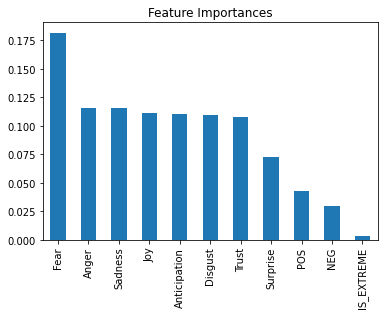

In [ ]:
forest_importances.plot.bar()
plt.title('Feature Importances')
plt.show()

In [ ]:
# 每個運動員的雷達圖

import numpy as np
import matplotlib.pyplot as plt
# 用於正常顯示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
#用於正常顯示符號
plt.rcParams['axes.unicode_minus'] = False

# 使用ggplot的繪圖風格，這個類似於美化了，可以通過plt.style.available查看可選值，你會發現其它的風格真的醜。。。
plt.style.use('ggplot')

# 各運動員的 keymoji
col_list = ['Trust', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Anger', 'Disgust', 'Sadness']
keymoji_guo = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_J/KeyMoji_score_ALL_GUO.csv', usecols=col_list)
key_list_guo = [np.mean(keymoji_guo["Trust"]), np.mean(keymoji_guo["Joy"]), np.mean(keymoji_guo["Surprise"]), np.mean(keymoji_guo["Anticipation"]), np.mean(keymoji_guo["Fear"]), np.mean(keymoji_guo["Anger"]), np.mean(keymoji_guo["Disgust"]), np.mean(keymoji_guo["Sadness"])]
print(key_list_guo)

keymoji_lee = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_J/KeyMoji_score_ALL_LEE.csv', usecols=col_list)
key_list_lee = [np.mean(keymoji_lee["Trust"]), np.mean(keymoji_lee["Joy"]), np.mean(keymoji_lee["Surprise"]), np.mean(keymoji_lee["Anticipation"]), np.mean(keymoji_lee["Fear"]), np.mean(keymoji_lee["Anger"]), np.mean(keymoji_lee["Disgust"]), np.mean(keymoji_lee["Sadness"])]
print(key_list_lee)

keymoji_lin = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_J/KeyMoji_score_ALL_LIN.csv', usecols=col_list)
key_list_lin = [np.mean(keymoji_lin["Trust"]), np.mean(keymoji_lin["Joy"]), np.mean(keymoji_lin["Surprise"]), np.mean(keymoji_lin["Anticipation"]), np.mean(keymoji_lin["Fear"]), np.mean(keymoji_lin["Anger"]), np.mean(keymoji_lin["Disgust"]), np.mean(keymoji_lin["Sadness"])]
print(key_list_lin)

keymoji_tai = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_J/KeyMoji_score_ALL_TAI.csv', usecols=col_list)
key_list_tai = [np.mean(keymoji_tai["Trust"]), np.mean(keymoji_tai["Joy"]), np.mean(keymoji_tai["Surprise"]), np.mean(keymoji_tai["Anticipation"]), np.mean(keymoji_tai["Fear"]), np.mean(keymoji_tai["Anger"]), np.mean(keymoji_tai["Disgust"]), np.mean(keymoji_tai["Sadness"])]
print(key_list_tai)

keymoji_yang = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_J/KeyMoji_score_ALL_YANG.csv', usecols=col_list)
key_list_yang = [np.mean(keymoji_yang["Trust"]), np.mean(keymoji_yang["Joy"]), np.mean(keymoji_yang["Surprise"]), np.mean(keymoji_yang["Anticipation"]), np.mean(keymoji_yang["Fear"]), np.mean(keymoji_yang["Anger"]), np.mean(keymoji_yang["Disgust"]), np.mean(keymoji_yang["Sadness"])]
print(key_list_yang)

[1.185244329896907, 1.3016731958762888, 1.2976855670103093, 1.083557731958763, 1.1724391752577321, 1.123960824742268, 1.17619793814433, 1.3770226804123709]
[2.742945454545454, 3.1445000000000007, 3.1573393939393943, 2.9326151515151517, 0.8592969696969697, 0.9929757575757574, 0.9539545454545456, 1.240109090909091]
[1.9074589999999998, 1.9762279999999999, 1.8428920000000002, 1.7908939999999993, 1.00774, 0.9174039999999998, 0.981421, 1.172517]
[1.8560229999999995, 2.0196260000000006, 1.997822, 1.8102929999999995, 1.035588, 1.0789459999999997, 1.1196049999999997, 1.2812970000000004]
[1.457156, 1.4537, 1.5275769999999997, 1.277934, 1.3130359999999999, 1.332758, 1.3574599999999999, 1.4552729999999996]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


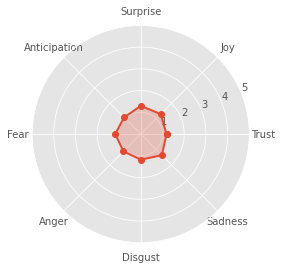

In [ ]:
# 構造數據
# GUO
values = key_list_guo
feature = ['Trust','Joy','Surprise','Anticipation','Fear', 'Anger', 'Disgust', 'Sadness']

# 設置每個數據點的顯示位置，在雷達圖上用角度表示
angles=np.linspace(0, 2*np.pi, len(values), endpoint=False)

# 拼接數據首尾，使圖形中線條封閉
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 繪圖
fig=plt.figure()
# 設置爲極座標格式
ax = fig.add_subplot(111, polar=True)
# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2)
# 填充顏色
ax.fill(angles, values, alpha=0.25)

# 設置圖標上的角度劃分刻度，爲每個數據點處添加標籤
ax.set_thetagrids(angles * 180/np.pi, feature)

# 設置雷達圖的範圍
ax.set_ylim(0,5)
# 添加標題
#plt.title('GUO Keymoji')
# 添加網格線
ax.grid(True)

plt.show()

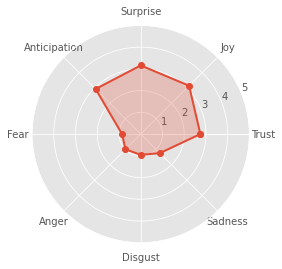

In [ ]:
# 構造數據
# LEE
values = key_list_lee
feature = ['Trust','Joy','Surprise','Anticipation','Fear', 'Anger', 'Disgust', 'Sadness']

# 設置每個數據點的顯示位置，在雷達圖上用角度表示
angles=np.linspace(0, 2*np.pi, len(values), endpoint=False)

# 拼接數據首尾，使圖形中線條封閉
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 繪圖
fig=plt.figure()
# 設置爲極座標格式
ax = fig.add_subplot(111, polar=True)
# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2)
# 填充顏色
ax.fill(angles, values, alpha=0.25)

# 設置圖標上的角度劃分刻度，爲每個數據點處添加標籤
ax.set_thetagrids(angles * 180/np.pi, feature)

# 設置雷達圖的範圍
ax.set_ylim(0,5)
# 添加標題
#plt.title('GUO Keymoji')
# 添加網格線
ax.grid(True)

plt.show()

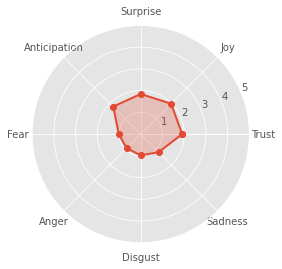

In [ ]:
# 構造數據
# LIN
values = key_list_lin
feature = ['Trust','Joy','Surprise','Anticipation','Fear', 'Anger', 'Disgust', 'Sadness']

# 設置每個數據點的顯示位置，在雷達圖上用角度表示
angles=np.linspace(0, 2*np.pi, len(values), endpoint=False)

# 拼接數據首尾，使圖形中線條封閉
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 繪圖
fig=plt.figure()
# 設置爲極座標格式
ax = fig.add_subplot(111, polar=True)
# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2)
# 填充顏色
ax.fill(angles, values, alpha=0.25)

# 設置圖標上的角度劃分刻度，爲每個數據點處添加標籤
ax.set_thetagrids(angles * 180/np.pi, feature)

# 設置雷達圖的範圍
ax.set_ylim(0,5)
# 添加標題
#plt.title('GUO Keymoji')
# 添加網格線
ax.grid(True)

plt.show()

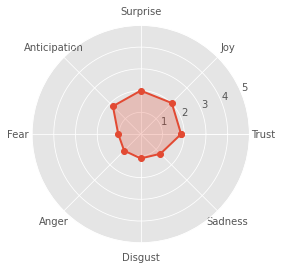

In [ ]:
# 構造數據
# TAI
values = key_list_tai
feature = ['Trust','Joy','Surprise','Anticipation','Fear', 'Anger', 'Disgust', 'Sadness']

# 設置每個數據點的顯示位置，在雷達圖上用角度表示
angles=np.linspace(0, 2*np.pi, len(values), endpoint=False)

# 拼接數據首尾，使圖形中線條封閉
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 繪圖
fig=plt.figure()
# 設置爲極座標格式
ax = fig.add_subplot(111, polar=True)
# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2)
# 填充顏色
ax.fill(angles, values, alpha=0.25)

# 設置圖標上的角度劃分刻度，爲每個數據點處添加標籤
ax.set_thetagrids(angles * 180/np.pi, feature)

# 設置雷達圖的範圍
ax.set_ylim(0,5)
# 添加標題
#plt.title('GUO Keymoji')
# 添加網格線
ax.grid(True)

plt.show()

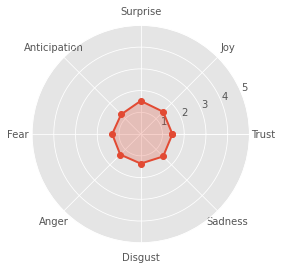

In [ ]:
# 構造數據
# YANG
values = key_list_yang
feature = ['Trust','Joy','Surprise','Anticipation','Fear', 'Anger', 'Disgust', 'Sadness']

# 設置每個數據點的顯示位置，在雷達圖上用角度表示
angles=np.linspace(0, 2*np.pi, len(values), endpoint=False)

# 拼接數據首尾，使圖形中線條封閉
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 繪圖
fig=plt.figure()
# 設置爲極座標格式
ax = fig.add_subplot(111, polar=True)
# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2)
# 填充顏色
ax.fill(angles, values, alpha=0.25)

# 設置圖標上的角度劃分刻度，爲每個數據點處添加標籤
ax.set_thetagrids(angles * 180/np.pi, feature)

# 設置雷達圖的範圍
ax.set_ylim(0,5)
# 添加標題
#plt.title('GUO Keymoji')
# 添加網格線
ax.grid(True)

plt.show()

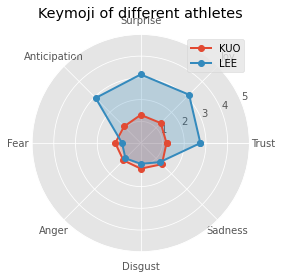

In [ ]:
# LEE
values_2 = key_list_lee
values_2 = np.concatenate([values_2,[values_2[0]]])

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2,label='KUO')
ax.fill(angles, values, alpha=0.25)

ax.plot(angles, values_2, 'o-', linewidth=2,label='LEE')
ax.fill(angles, values_2, alpha=0.25)

ax.set_thetagrids(angles * 180/np.pi, feature)
ax.set_ylim(0,5)
plt.title('Keymoji of different athletes')
plt.legend(loc='best')
ax.grid(True)
plt.show()

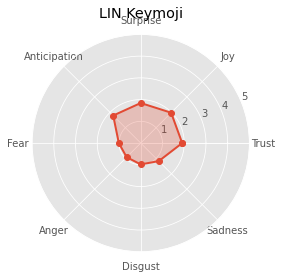

In [ ]:
# LIN
values = key_list_lin
feature = ['Trust','Joy','Surprise','Anticipation','Fear', 'Anger', 'Disgust', 'Sadness']

# 設置每個數據點的顯示位置，在雷達圖上用角度表示
angles = np.linspace(0, 2*np.pi, len(values), endpoint=False)

# 拼接數據首尾，使圖形中線條封閉
values = np.concatenate((values,[values[0]]))
angles = np.concatenate((angles,[angles[0]]))

# 繪圖
fig = plt.figure()
# 設置爲極座標格式
ax = fig.add_subplot(111, polar=True)
# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2)
# 填充顏色
ax.fill(angles, values, alpha=0.25)

# 設置圖標上的角度劃分刻度，爲每個數據點處添加標籤
ax.set_thetagrids(angles * 180/np.pi, feature)

# 設置雷達圖的範圍
ax.set_ylim(0,5)
# 添加標題
plt.title('LIN Keymoji')
# 添加網格線
ax.grid(True)

plt.show()

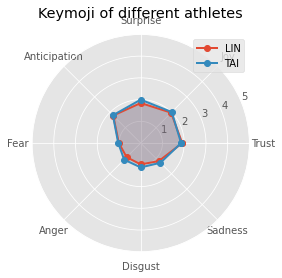

In [ ]:
# TAI
values_2 = key_list_tai
values_2 = np.concatenate([values_2,[values_2[0]]])

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2,label='LIN')
ax.fill(angles, values, alpha=0.25)

ax.plot(angles, values_2, 'o-', linewidth=2,label='TAI')
ax.fill(angles, values_2, alpha=0.25)

ax.set_thetagrids(angles * 180/np.pi, feature)
ax.set_ylim(0,5)
plt.title('Keymoji of different athletes')
plt.legend(loc='best')
ax.grid(True)
plt.show()

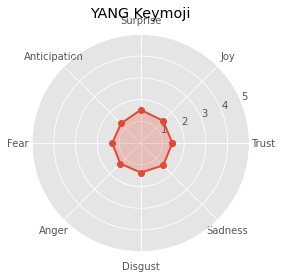

In [ ]:
# YANG
values = key_list_yang
feature = ['Trust','Joy','Surprise','Anticipation','Fear', 'Anger', 'Disgust', 'Sadness']

# 設置每個數據點的顯示位置，在雷達圖上用角度表示
angles = np.linspace(0, 2*np.pi, len(values), endpoint=False)

# 拼接數據首尾，使圖形中線條封閉
values = np.concatenate((values,[values[0]]))
angles = np.concatenate((angles,[angles[0]]))

# 繪圖
fig = plt.figure()
# 設置爲極座標格式
ax = fig.add_subplot(111, polar=True)
# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2)
# 填充顏色
ax.fill(angles, values, alpha=0.25)

# 設置圖標上的角度劃分刻度，爲每個數據點處添加標籤
ax.set_thetagrids(angles * 180/np.pi, feature)

# 設置雷達圖的範圍
ax.set_ylim(0,5)
# 添加標題
plt.title('YANG Keymoji')
# 添加網格線
ax.grid(True)

plt.show()

In [ ]:
# df 轉 tsv
data_tsv = data_all.drop(columns=['Title', 'Prediction', 'IS_EXTREME', 'comments'])
data_tsv.to_csv('/content/drive/Shareddrives/Text Mining/CSV/data.tsv', sep='\t', header=None, index=False)